In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
df = pd.read_csv("./data.csv")

# Фильтруем нужные поля
fields = [
    'neighbourhood_group',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df = df.loc[:, fields]


# Находим уникальные значения neighbourhood, room_type, 
neighbourhoods = df['neighbourhood'].unique()
neighbourhood_groups = df['neighbourhood_group'].unique()
room_types = df['room_type'].unique()

# Фильтруем данные для гистограмм
hist_data_price = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
hist_data_availability = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'room_type', 'availability_365']]

hist_data_price_groupped = hist_data_price.groupby(['neighbourhood_group', 'room_type']).mean('price')
hist_data_availability_groupped = hist_data_availability.groupby(['neighbourhood_group', 'room_type']).mean('availability')


<Axes: xlabel='room_type', ylabel='price'>

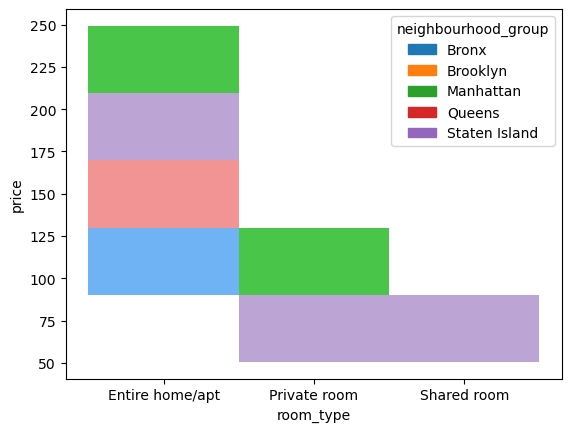

In [33]:
# Средняя цена в зависимости от типа жилья и района 
sb.histplot(hist_data_price_groupped, x = 'room_type', y = 'price', hue = 'neighbourhood_group')

<Axes: xlabel='room_type', ylabel='availability_365'>

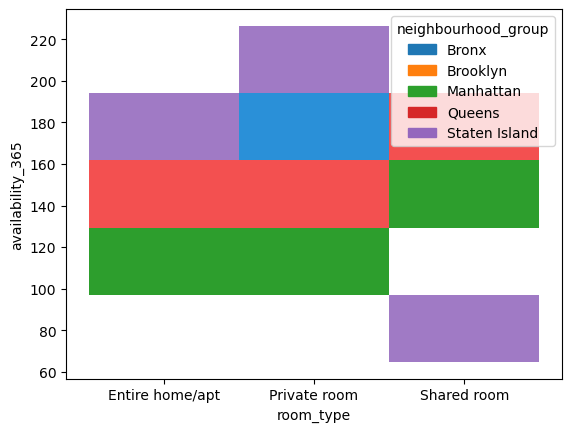

In [35]:
# Средняя достуаность в зависимости от типа жилья и района 
sb.histplot(hist_data_availability_groupped, x = 'room_type', y = 'availability_365', hue = 'neighbourhood_group')

In [ ]:
def filter_by_room_type(df_to_filter, room_type):
    return 